In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier

In [2]:
df1 = pd.read_csv("train.csv")

In [3]:
df11 = pd.read_csv("test.csv")

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df11.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df1["Age"] = df1["Age"].fillna(df1["Age"].median())

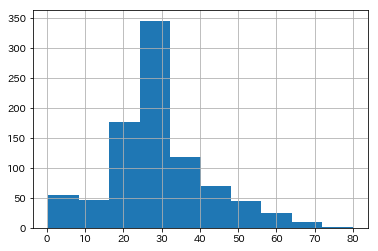

In [8]:
df1["Age"].hist()

In [11]:
df2 = df1.drop(["Name", "Ticket", "Cabin"], axis=1)

In [12]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
df3 = df2.replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

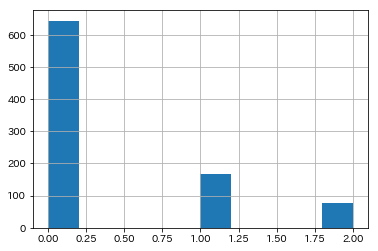

In [19]:
df3["Embarked"].hist()

In [20]:
df3["Embarked"] = df3["Embarked"].fillna(0)

In [21]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [22]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
df3.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [ ]:
# Sex ,Fareのみを残して学習モデルを作ってみる

In [24]:
df11.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
df12 = df11.drop(["Name", "Ticket", "Cabin"], axis=1)

In [26]:
df12.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [28]:
print(df12["Age"].mean())
print(df12["Age"].median())

30.272590361445783
27.0


In [29]:
df12["Age"] = df12["Age"].fillna(df12["Age"].median())

In [30]:
print(df12["Fare"].mean())
print(df12["Fare"].median())

35.6271884892086
14.4542


In [31]:
df12["Fare"] = df12["Fare"].fillna(df12["Fare"].median())

In [32]:
df13 = df12.replace("male", 0).replace("female", 1).replace("S", 0).replace("C", 1).replace("Q", 2)

In [33]:
df13.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [35]:
df13.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [61]:
print(df3.info())
print(df13.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB
None


In [46]:
# pandasのDataFrameはそのままではscikit-learnに渡せない。
# 数値データではないカラムへの対処、数値データのnumpy.ndarrayへの変換が必要らしい
# 数値データへの変換は完了済み
# 最後にvaluesメソッドを使うことでnumpy.ndarrayに変換可能
train_data = df3.values

In [ ]:
# ここから学習

In [47]:
# まずは学習に使う特徴量を抽出
# 今回は特徴量が2つなのでilocではなく、そのままカラム名を指定
trainX = df3[["Sex", "Fare"]]

In [48]:
trainX.head()

,Sex,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500


In [49]:
# 正解データを抽出
trainY = df3["Survived"]

In [50]:
trainY.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# 学習に使うデータの選択が終了
# ここからはモデルの選択

In [51]:
# 箱clfを用意
# 決定木の数を50に設定してモデルインスタンスを作成し、用意した箱clfに代入
clf = RandomForestClassifier(n_estimators = 50, random_state=0)

In [52]:
# 学習
clf = clf.fit(trainX, trainY)

In [ ]:
# ---学習終了
# ここから予測

In [53]:
test_data = df13.values

In [54]:
testX = df13[["Sex", "Fare"]]

In [55]:
testY = clf.predict(testX)

In [ ]:
# ---予測終了。
# ここから提出ファイルの準備

In [56]:
output = pd.read_csv("test.csv")

In [57]:
output["Survived"] = testY

In [59]:
output[["PassengerId","Survived"]].to_csv("output_submission_180430.csv",index=False)

In [ ]:
# ---これで終了。カレントディレクトリに出力されたoutput_submission_180430.csvファイルをkaggleに提出→正解率は0.74641と前回よりもアップ
# →FareもSurvivedとの相関が0.2程度だったので特徴量はSexだけでも良いかも